In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(font_scale=1.25)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [29]:
# finding this out for Borough bronx since it was the most effected as shown in Problem Statement 2

df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data set for GTechnologies capstone project/BX_18v1.csv")
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19,20,22,23,64,65,80) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,PolicePrct,HealthCenterDistrict,HealthArea,SanitBoro,SanitDistrict,SanitSub,Address,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,Overlay1,Overlay2,SPDist1,SPDist2,SPDist3,LtdHeight,SplitZone,BldgClass,LandUse,Easements,OwnerType,OwnerName,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,...,UnitsTotal,LotFront,LotDepth,BldgFront,BldgDepth,Ext,ProxCode,IrrLotCode,LotType,BsmtCode,AssessLand,AssessTot,ExemptLand,ExemptTot,YearBuilt,YearAlter1,YearAlter2,HistDist,Landmark,BuiltFAR,ResidFAR,CommFAR,FacilFAR,BoroCode,BBL,CondoNo,Tract2010,XCoord,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLAG,PFIRM15_FLAG,Version
0,BX,2260,1,201,19.0,1022.0,7.0,8.0,10454.0,L029,40.0,23.0,4700.0,2.0,1.0,2A,122 BRUCKNER BOULEVARD,M1-5/R8A,NaN,NaN,NaN,NaN,NaN,MX-1,NaN,NaN,NaN,N,Z9,NaN,0,NaN,122 BRUCKNER PARTNERS,15000,0,0,0,0,0,0,...,0,75.00,200.0,0.0,0.0,NaN,0.0,N,3.0,0.0,130500,161100,0,0,0,0,0,NaN,NaN,0.00,6.02,5.0,6.5,2,2022600001,0,19,1005957.0,232162.0,6b,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
1,BX,2260,4,201,19.0,1022.0,7.0,8.0,10454.0,L029,40.0,23.0,4700.0,2.0,1.0,2A,126 BRUCKNER BOULEVARD,M1-5/R8A,NaN,NaN,NaN,NaN,NaN,MX-1,NaN,NaN,NaN,N,G5,7.0,0,NaN,24 INDIAN HEAD HOLDIN,13770,752,752,0,272,0,0,...,1,137.58,100.0,16.0,16.0,NaN,0.0,N,5.0,0.0,117000,326700,0,0,1931,1994,0,NaN,NaN,0.05,6.02,5.0,6.5,2,2022600004,0,19,1006076.0,232156.0,6b,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
2,BX,2260,10,201,19.0,1022.0,7.0,8.0,10454.0,L029,40.0,23.0,4700.0,2.0,1.0,2A,138 BRUCKNER BOULEVARD,M1-5/R8A,NaN,NaN,NaN,NaN,NaN,MX-1,NaN,NaN,NaN,N,F5,6.0,0,P,ANJOST CORP,35000,39375,39375,0,0,0,0,...,1,175.00,200.0,175.0,200.0,NaN,0.0,N,4.0,0.0,153000,879300,0,0,1931,0,0,NaN,NaN,1.13,6.02,5.0,6.5,2,2022600010,0,19,1006187.0,232036.0,6b,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
3,BX,2260,17,201,19.0,1022.0,7.0,8.0,10454.0,L029,40.0,23.0,4700.0,2.0,1.0,2A,144 BRUCKNER BOULEVARD,M1-5/R8A,NaN,NaN,NaN,NaN,NaN,MX-1,NaN,NaN,NaN,N,C1,2.0,0,NaN,144 BRUCKNER LLC,2500,12500,0,12500,0,0,0,...,15,25.00,100.0,25.0,85.0,NaN,0.0,N,5.0,0.0,51300,332550,0,0,1931,2001,0,NaN,NaN,5.00,6.02,5.0,6.5,2,2022600017,0,19,1006299.0,232033.0,6b,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
4,BX,2260,18,201,19.0,1022.0,7.0,8.0,10454.0,L029,40.0,23.0,4700.0,2.0,1.0,2A,148 BRUCKNER BOULEVARD,M1-5/R8A,NaN,NaN,NaN,NaN,NaN,MX-1,NaN,NaN,NaN,N,C7,2.0,0,P,148 BRUCKNER LLC,1875,8595,1719,6876,0,1719,0,...,10,25.00,75.0,25.0,70.0,NaN,0.0,N,3.0,2.0,17490,125304,0,52349,1920,2009,0,NaN,NaN,4.58,6.02,5.0,6.5,2,2022600018,0,19,1006363.0,232040.0,6b,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89854 entries, 0 to 89853
Data columns (total 87 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Borough               89854 non-null  object 
 1   Block                 89854 non-null  int64  
 2   Lot                   89854 non-null  int64  
 3   CD                    89854 non-null  int64  
 4   CT2010                89447 non-null  float64
 5   CB2010                87342 non-null  float64
 6   SchoolDist            89695 non-null  float64
 7   Council               89649 non-null  float64
 8   ZipCode               89525 non-null  float64
 9   FireComp              89568 non-null  object 
 10  PolicePrct            89692 non-null  float64
 11  HealthCenterDistrict  89727 non-null  float64
 12  HealthArea            89630 non-null  float64
 13  SanitBoro             89235 non-null  float64
 14  SanitDistrict         89238 non-null  float64
 15  SanitSub           

In [5]:
df.describe(include='all')

,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,PolicePrct,HealthCenterDistrict,HealthArea,SanitBoro,SanitDistrict,SanitSub,Address,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,Overlay1,Overlay2,SPDist1,SPDist2,SPDist3,LtdHeight,SplitZone,BldgClass,LandUse,Easements,OwnerType,OwnerName,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,...,UnitsTotal,LotFront,LotDepth,BldgFront,BldgDepth,Ext,ProxCode,IrrLotCode,LotType,BsmtCode,AssessLand,AssessTot,ExemptLand,ExemptTot,YearBuilt,YearAlter1,YearAlter2,HistDist,Landmark,BuiltFAR,ResidFAR,CommFAR,FacilFAR,BoroCode,BBL,CondoNo,Tract2010,XCoord,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLAG,PFIRM15_FLAG,Version
count,89854,89854.000000,89854.000000,89854.000000,89447.000000,87342.000000,89695.000000,89649.000000,89525.000000,89568,89692.000000,89727.000000,89630.000000,89235.000000,89238.000000,88789,89785,89795,2553,34,2,8827,96,4602,0.0,0.0,0.0,89788,89788,89440.000000,89854.000000,16374,89280,8.985400e+04,8.985400e+04,8.985400e+04,8.985400e+04,8.985400e+04,89854.000000,89854.000000,...,89854.000000,89854.000000,89854.000000,89854.000000,89854.000000,29034,89788.000000,89788,89788.000000,89788.000000,8.985400e+04,8.985400e+04,8.985400e+04,8.985400e+04,89854.000000,89854.000000,89854.000000,854,111,89854.000000,89854.000000,89854.000000,89854.000000,89854.0,8.985400e+04,89854.000000,89854.000000,8.659500e+04,86595.000000,89817,1688,89735,89735.000000,1470,8.978800e+04,10969,89854.000000,3511.0,3332.0,89854
unique,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,NaN,NaN,NaN,NaN,NaN,22,87017,66,52,19,2,10,8,12,NaN,NaN,NaN,2,182,NaN,NaN,5,77013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,1,1128,NaN,75,NaN,1672,NaN,NaN,NaN,1
top,BX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E072,NaN,NaN,NaN,NaN,NaN,1B,SHORE DRIVE,R5,R6,R6A,R5,C1-4,C2-4,CD,NaN,NaN,NaN,N,B1,NaN,NaN,P,PARKS AND RECREATION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,G,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fieldston Historic District,INDIVIDUAL LANDMARK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2b,Y,222 043,NaN,E-442,NaN,10/22/1992,NaN,NaN,NaN,18V1
freq,89854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6479,NaN,NaN,NaN,NaN,NaN,9091,42,12871,298,4,1,2897,39,1476,NaN,NaN,NaN,87157,14787,NaN,NaN,13010,615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,21626,NaN,70591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,298,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13504,1688,369,NaN,299,NaN,168,NaN,NaN,NaN,89854
mean,NaN,4131.182251,111.493601,208.689285,261.931201,2262.054911,9.875177,13.771554,10464.280726,NaN,45.990244,24.223456,1726.335379,1.999473,8.688149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.505456,0.007301,NaN,NaN,1.023904e+04,8.113609e+03,2.185541e+03,5.720876e+03,5.057144e+02,349.916910,256.978098,...,6.378703,46.859019,105.978085,29.826389,48.229342,NaN,1.355460,NaN,4.676427,1.558204,5.447279e+04,3.055160e+05,2.775422e+04,1.724013e+05,1805.695150,176.591782,20.207893,NaN,NaN,1.107134,1.674844,0.130644,2.853723,2.0,2.041312e+09,0.247168,4570.454426,1.021686e+06,249975.676667,NaN,NaN,NaN,21427.498323,NaN,2.489073e+08,NaN,1.005409,1.0,1.0,NaN
std,NaN,1018.222757,467.387099,3.391957,135.896915,1295.630978,1.495090,2.510671,7.292127,NaN,2.960286,1.657153,1237.852724,0.043257,3.309514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.772467,0.105348,NaN,NaN,3.058252e+05,6.520439e+04,2.952023e+04,5.660190e+04,1.196641e+04,4911.023897,7097.093634,...,63.834891,80.937351,73.946506,38.759032,31.333564,NaN,1.026046,NaN,0.855714,1.448915,7.681052e+05,4.520943e+06,7.564633e+05,4.419138e+06,499.485278,567.142346,200.230975,NaN,NaN,1.799155,1.309456,0.574606,1.605805,0.0,1.018227e+07,6.057533,11176.004071,8.599340e+03,9778.614120,NaN,NaN,NaN,870.304482,NaN,6.672353e+08,NaN,0.106094,0.0,0.0,NaN
min,NaN,0.000000,1.000000,111.000000,1.000000,1.000000,7.000000,8.000000,10

In [7]:
df['Lot'].value_counts()

1       2486
20      1207
15      1178
5       1169
25      1168
        ... 
1636       1
3813       1
1892       1
2148       1
2049       1
Name: Lot, Length: 1960, dtype: int64

In [8]:
df['ZipCode'].value_counts()

10469.0    11349
10466.0     9229
10465.0     8163
10461.0     7499
10473.0     4870
10467.0     4673
10462.0     4671
10472.0     4329
10457.0     3028
10460.0     2892
10456.0     2876
10458.0     2769
10459.0     2605
10471.0     2352
10470.0     2334
10463.0     2247
10453.0     2102
10455.0     1793
10454.0     1746
10468.0     1627
10464.0     1550
10452.0     1548
10451.0     1228
10474.0     1220
10475.0      823
11370.0        2
Name: ZipCode, dtype: int64

In [19]:
df_num = df.select_dtypes(include=['int'])

In [20]:
df_num.head()

,Block,Lot,CD,Easements,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,AreaSource,NumBldgs,UnitsRes,UnitsTotal,AssessLand,AssessTot,ExemptLand,ExemptTot,YearBuilt,YearAlter1,YearAlter2,BoroCode,BBL,CondoNo,Tract2010,PLUTOMapID
0,2260,1,201,0,15000,0,0,0,0,0,0,0,0,0,7,1,0,0,130500,161100,0,0,0,0,0,2,2022600001,0,19,1
1,2260,4,201,0,13770,752,752,0,272,0,0,480,0,0,2,2,0,1,117000,326700,0,0,1931,1994,0,2,2022600004,0,19,1
2,2260,10,201,0,35000,39375,39375,0,0,0,0,0,39375,0,2,1,0,1,153000,879300,0,0,1931,0,0,2,2022600010,0,19,1
3,2260,17,201,0,2500,12500,0,12500,0,0,0,0,0,0,2,1,15,15,51300,332550,0,0,1931,2001,0,2,2022600017,0,19,1
4,2260,18,201,0,1875,8595,1719,6876,0,1719,0,0,0,0,2,1,8,10,17490,125304,0,52349,1920,2009,0,2,2022600018,0,19,1


In [21]:
df_num.dropna(inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
df_num.isnull().sum()

Block         0
Lot           0
CD            0
Easements     0
LotArea       0
BldgArea      0
ComArea       0
ResArea       0
OfficeArea    0
RetailArea    0
GarageArea    0
StrgeArea     0
FactryArea    0
OtherArea     0
AreaSource    0
NumBldgs      0
UnitsRes      0
UnitsTotal    0
AssessLand    0
AssessTot     0
ExemptLand    0
ExemptTot     0
YearBuilt     0
YearAlter1    0
YearAlter2    0
BoroCode      0
BBL           0
CondoNo       0
Tract2010     0
PLUTOMapID    0
dtype: int64

<Figure size 1440x1440 with 0 Axes>

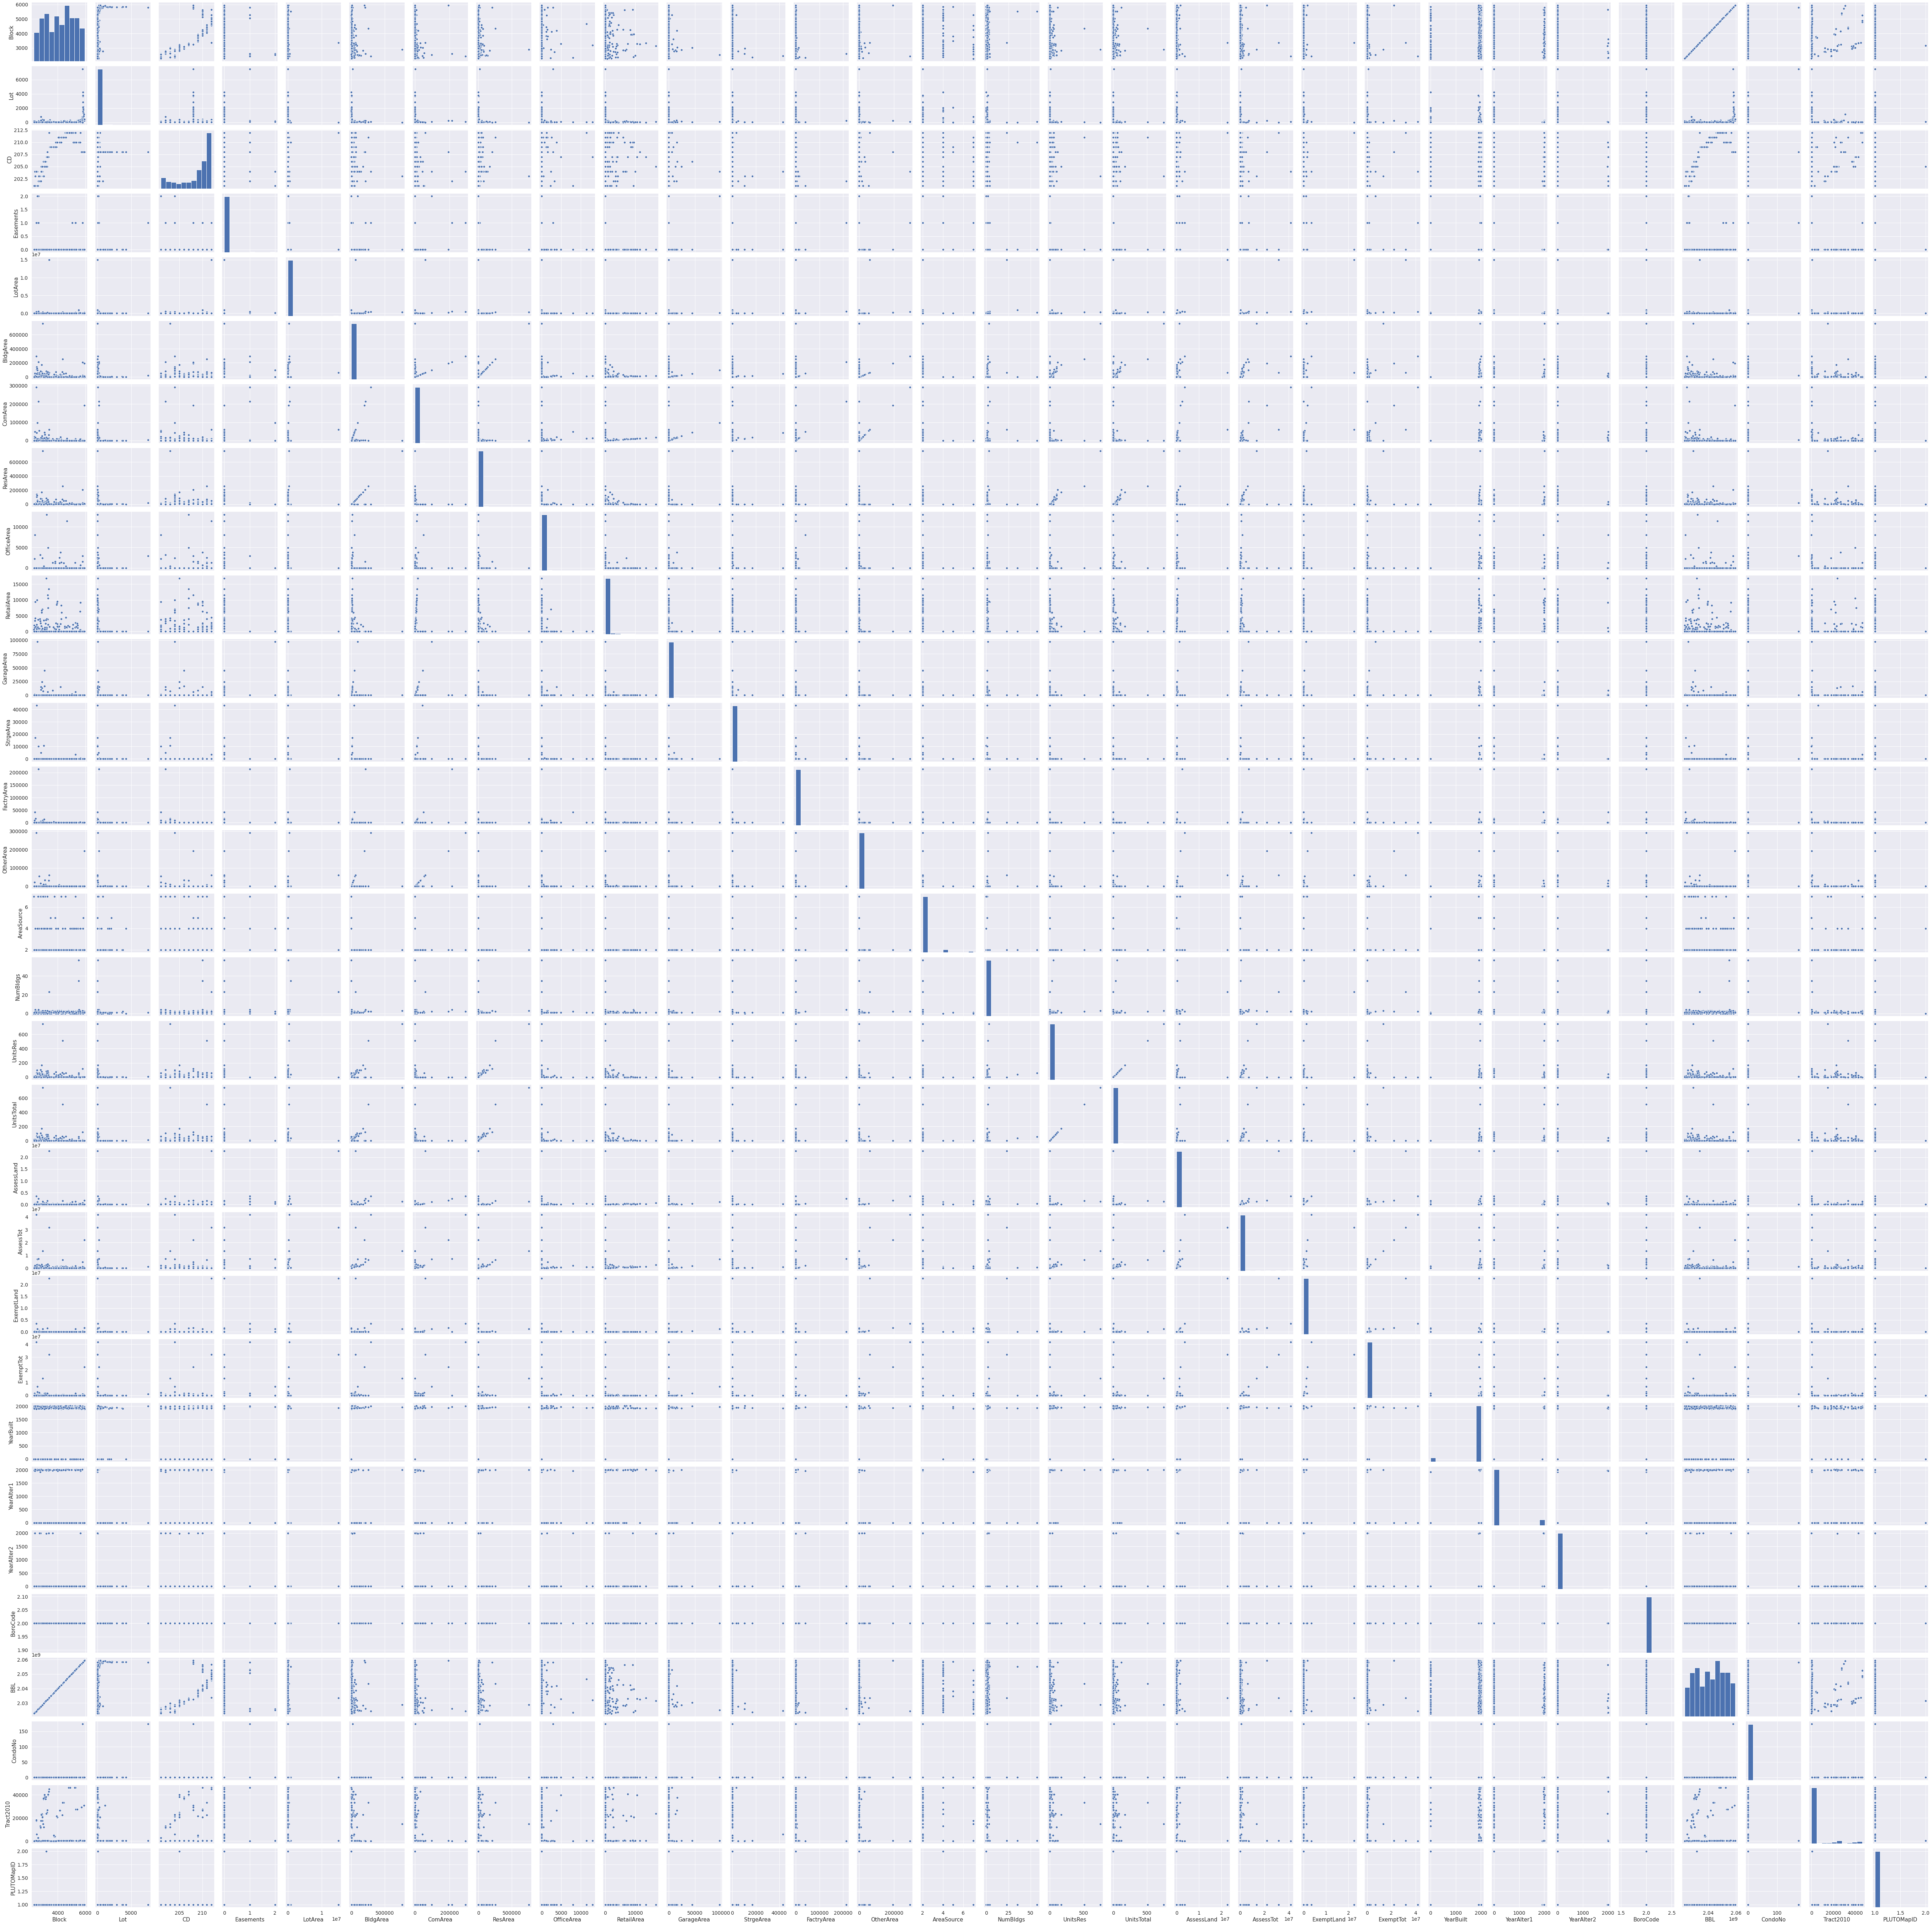

In [23]:
plt.figure(figsize=(20,20))
sns.pairplot(data=df_num.sample(1000))
plt.show()

In [24]:
df_num.corr()

,Block,Lot,CD,Easements,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,AreaSource,NumBldgs,UnitsRes,UnitsTotal,AssessLand,AssessTot,ExemptLand,ExemptTot,YearBuilt,YearAlter1,YearAlter2,BoroCode,BBL,CondoNo,Tract2010,PLUTOMapID
Block,1.000000,0.101267,0.743921,-0.035980,0.005532,-0.059285,-0.047333,-0.044197,-0.033449,-0.035718,-0.014494,-0.026637,-0.050580,-0.015348,-0.081887,0.039849,-0.044594,-0.047345,-0.014475,-0.033515,-0.007126,-0.024511,0.066497,-0.152239,-0.058210,NaN,1.000000,-0.018772,-0.086709,-0.003078
Lot,0.101267,1.000000,-0.063950,0.347471,0.007093,0.073610,0.029533,0.067992,0.017978,0.072649,0.025711,0.000400,0.001104,0.003121,0.016329,0.090746,0.067735,0.069183,0.018260,0.041363,0.005218,0.024305,-0.034874,-0.006138,-0.006647,NaN,0.101312,0.645139,-0.003877,0.101904
CD,0.743921,-0.063950,1.000000,-0.053295,0.069480,-0.009390,0.068980,-0.047468,-0.033834,-0.036687,-0.017024,-0.034703,-0.066383,0.140186,-0.113212,0.115791,-0.045216,-0.048062,0.081937,0.045722,0.094780,0.059340,0.109557,-0.179889,-0.071517,NaN,0.743914,-0.032166,-0.012528,-0.035256
Easements,-0.035980,0.347471,-0.053295,1.000000,0.032534,0.111887,0.076891,0.087949,0.051035,0.059931,0.039185,0.106048,0.053072,0.010761,0.079904,0.077409,0.074927,0.077725,0.055919,0.066248,0.041379,0.051341,-0.061044,0.011204,0.014205,NaN,-0.035964,0.384495,-0.004462,0.013395
LotArea,0.005532,0.007093,0.069480,0.032534,1.000000,0.167099,0.231499,0.071807,0.076469,0.015745,0.082877,0.081181,0.024394,0.203877,0.007066,0.326774,0.057924,0.059679,0.701551,0.262471,0.706013,0.263821,-0.006990,0.026028,0.040120,NaN,0.005533,0.003496,-0.002054,0.006460
BldgArea,-0.059285,0.073610,-0.009390,0.111887,0.167099,1.000000,0.498687,0.891726,0.230304,0.166010,0.264472,0.113178,0.074035,0.360702,-0.025915,0.536618,0.738367,0.743505,0.370790,0.523412,0.341775,0.485901,0.031663,0.098253,0.065212,NaN,-0.059281,0.058663,0.029271,-0.000911
ComArea,-0.047333,0.029533,0.068980,0.076891,0.231499,0.498687,1.000000,0.052814,0.468004,0.217572,0.327229,0.254527,0.173095,0.796639,-0.015196,0.321104,0.044290,0.056067,0.492025,0.695564,0.467550,0.666568,0.019526,0.093120,0.094890,NaN,-0.047332,0.036218,0.006549,-0.002743
ResArea,-0.044197,0.067992,-0.047468,0.087949,0.071807,0.891726,0.052814,1.000000,0.021094,0.077777,0.133789,-0.002266,-0.004834,0.000116,-0.021080,0.450982,0.827642,0.827347,0.170522,0.240084,0.149983,0.212234,0.025267,0.064651,0.025740,NaN,-0.044194,0.045467,0.030475,-0.000038
OfficeArea,-0.033449,0.017978,-0.033834,0.051035,0.076469,0.230304,0.468004,0.021094,1.000000,0.045431,0.109704,0.069433,0.020299,0.014895,-0.010056,0.069412,0.008056,0.027155,0.172267,0.358120,0.157310,0.342224,0.011879,0.055257,0.058573,NaN,-0.033448,0.029847,0.005542,-0.001939
RetailArea,-0.035718,0.072649,-0.036687,0.059931,0.015745,0.166010,0.217572,0.077777,0.045431,1.000000,0.114285,0.004986,0.001410,0.004278,-0.015926,0.048758,0.091261,0.098391,0.087416,0.168696,0.020314,0.071311,0.019289,0.084324,0.078423,NaN,-0.035714,0.071359,0.026051,-0.003568


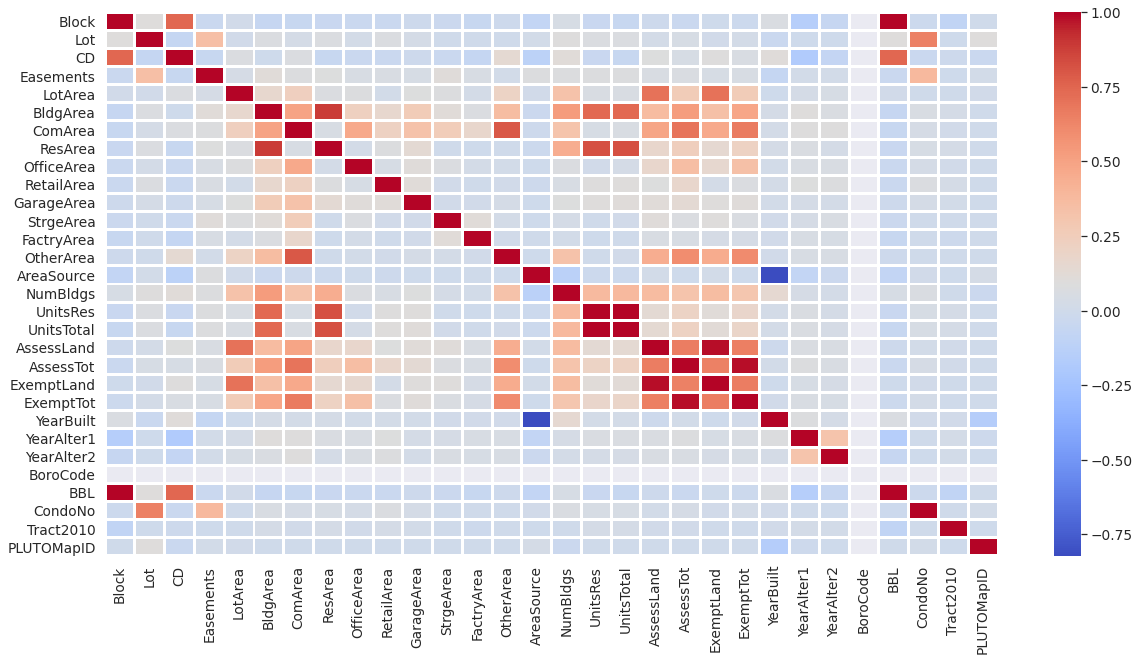

In [26]:
plt.figure(figsize=(20,10))
sns.heatmap(data=df_num.corr(),cmap="coolwarm",annot=False,fmt='.4g',linewidths=2)
plt.show()

In [30]:
df_main = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data set for GTechnologies capstone project/fhrw-4uyv.csv", parse_dates=True, infer_datetime_format=True, low_memory=False)
df_main.head()

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2020-07-30T10:32:37.000,47039324,PAINT/PLASTER,11377.0,37-80 64 STREET,64 STREET,ADDRESS,Woodside,The following complaint conditions are still o...,QUEENS,40.748268,-73.899022,NaN,RESIDENTIAL BUILDING,Open
1,2020-07-30T03:58:23.000,47039314,PLUMBING,10009.0,1 HAVEN PLAZA,HAVEN PLAZA,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.727016,-73.976440,NaN,RESIDENTIAL BUILDING,Open
2,2020-07-30T13:39:18.000,47039297,FLOORING/STAIRS,10027.0,244 WEST 122 STREET,WEST 122 STREET,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.807607,-73.951111,NaN,RESIDENTIAL BUILDING,Open
3,2020-07-30T16:00:19.000,47035400,GENERAL,11428.0,94-19 210 STREET,210 STREET,ADDRESS,Queens Village,The following complaint conditions are still o...,QUEENS,40.715435,-73.750837,NaN,RESIDENTIAL BUILDING,Open
4,2020-07-30T12:15:18.000,47036744,UNSANITARY CONDITION,10031.0,557 WEST 148 STREET,WEST 148 STREET,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.827796,-73.947707,NaN,RESIDENTIAL BUILDING,Open


In [37]:
df_num_main = df_main.select_dtypes(include=['int','float'])

In [38]:
df_num_main.head()

,unique_key,incident_zip,latitude,longitude
0,47039324,11377.0,40.748268,-73.899022
1,47039314,10009.0,40.727016,-73.976440
2,47039297,10027.0,40.807607,-73.951111
3,47035400,11428.0,40.715435,-73.750837
4,47036744,10031.0,40.827796,-73.947707


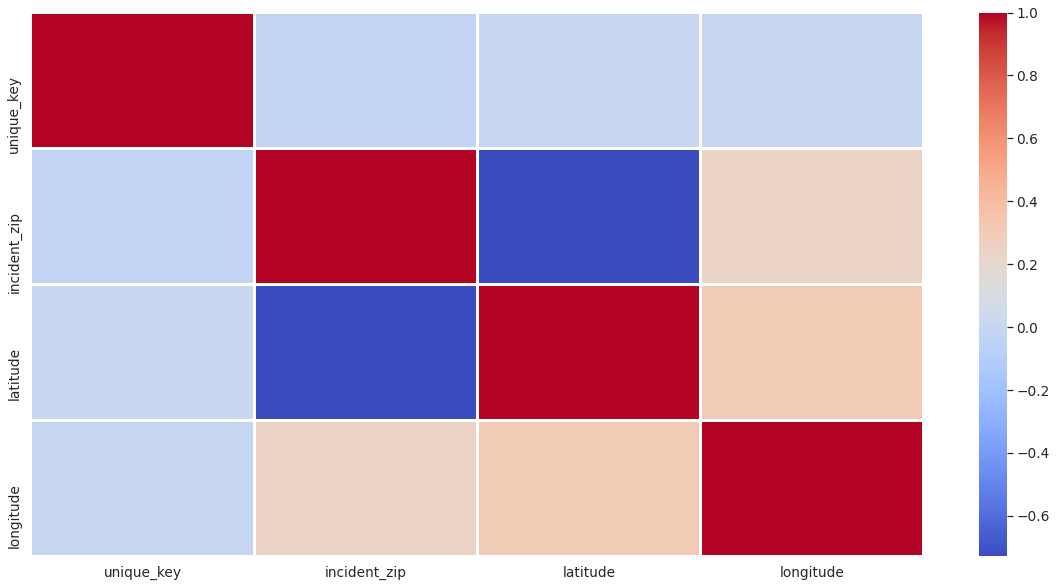

In [39]:
plt.figure(figsize=(20,10))
sns.heatmap(data=df_num_main.corr(),cmap="coolwarm",annot=False,fmt='.4g',linewidths=2)
plt.show()

In [40]:
df.columns

Index(['Borough', 'Block', 'Lot', 'CD', 'CT2010', 'CB2010', 'SchoolDist',
       'Council', 'ZipCode', 'FireComp', 'PolicePrct', 'HealthCenterDistrict',
       'HealthArea', 'SanitBoro', 'SanitDistrict', 'SanitSub', 'Address',
       'ZoneDist1', 'ZoneDist2', 'ZoneDist3', 'ZoneDist4', 'Overlay1',
       'Overlay2', 'SPDist1', 'SPDist2', 'SPDist3', 'LtdHeight', 'SplitZone',
       'BldgClass', 'LandUse', 'Easements', 'OwnerType', 'OwnerName',
       'LotArea', 'BldgArea', 'ComArea', 'ResArea', 'OfficeArea', 'RetailArea',
       'GarageArea', 'StrgeArea', 'FactryArea', 'OtherArea', 'AreaSource',
       'NumBldgs', 'NumFloors', 'UnitsRes', 'UnitsTotal', 'LotFront',
       'LotDepth', 'BldgFront', 'BldgDepth', 'Ext', 'ProxCode', 'IrrLotCode',
       'LotType', 'BsmtCode', 'AssessLand', 'AssessTot', 'ExemptLand',
       'ExemptTot', 'YearBuilt', 'YearAlter1', 'YearAlter2', 'HistDist',
       'Landmark', 'BuiltFAR', 'ResidFAR', 'CommFAR', 'FacilFAR', 'BoroCode',
       'BBL', 'CondoNo', 'Tra

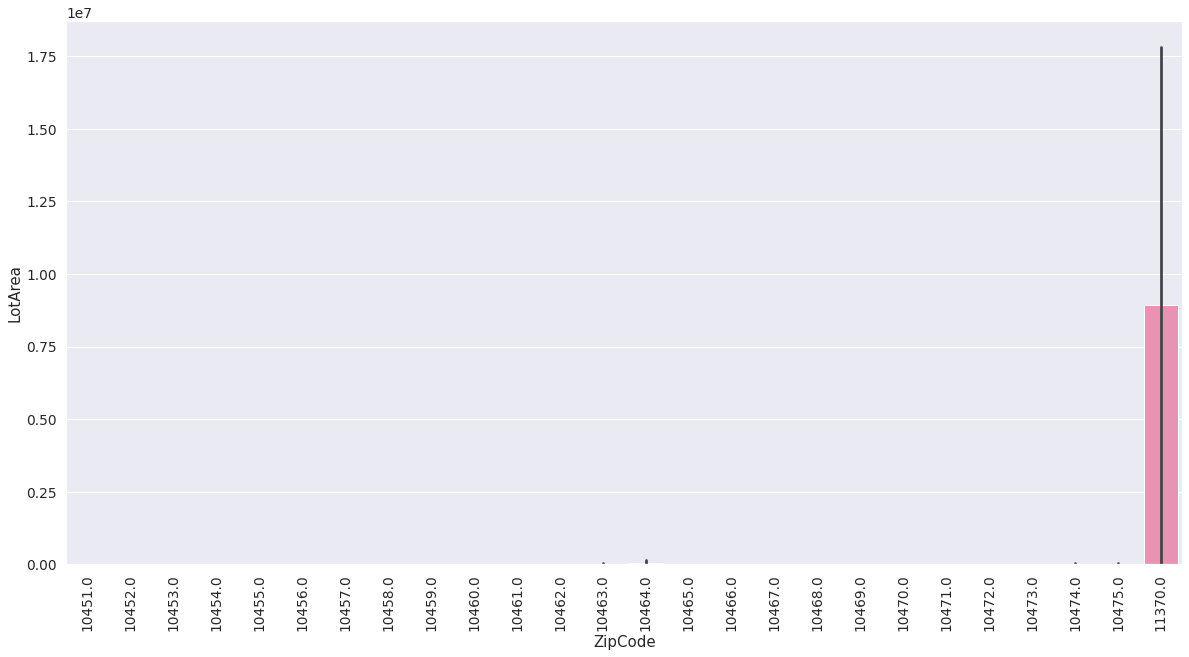

In [41]:
plt.figure(figsize=(20,10))
sns.barplot(x='ZipCode',y='LotArea',data=df)
plt.xticks(rotation=90)
plt.show()

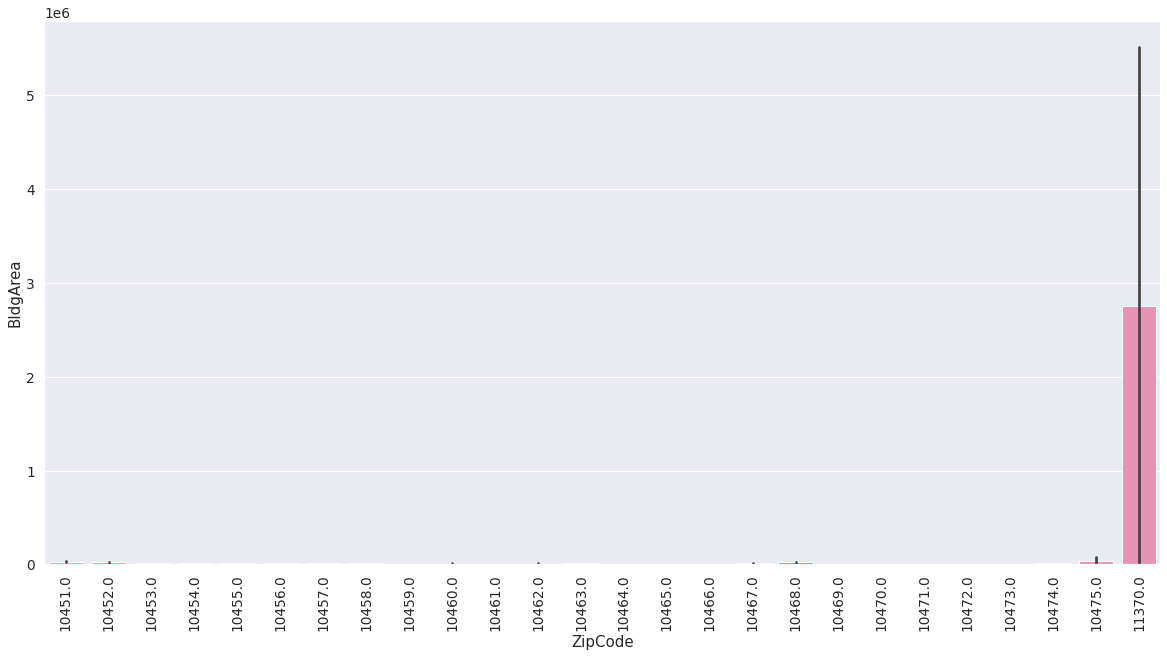

In [42]:
plt.figure(figsize=(20,10))
sns.barplot(x='ZipCode',y='BldgArea',data=df)
plt.xticks(rotation=90)
plt.show()

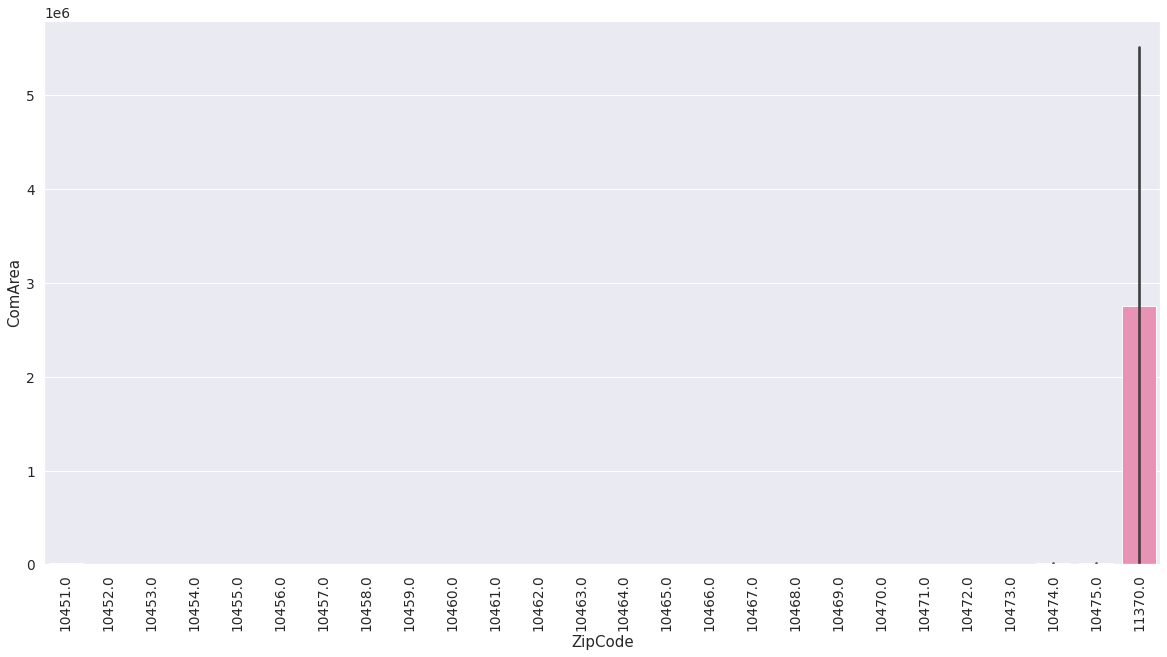

In [43]:
plt.figure(figsize=(20,10))
sns.barplot(x='ZipCode',y='ComArea',data=df)
plt.xticks(rotation=90)
plt.show()

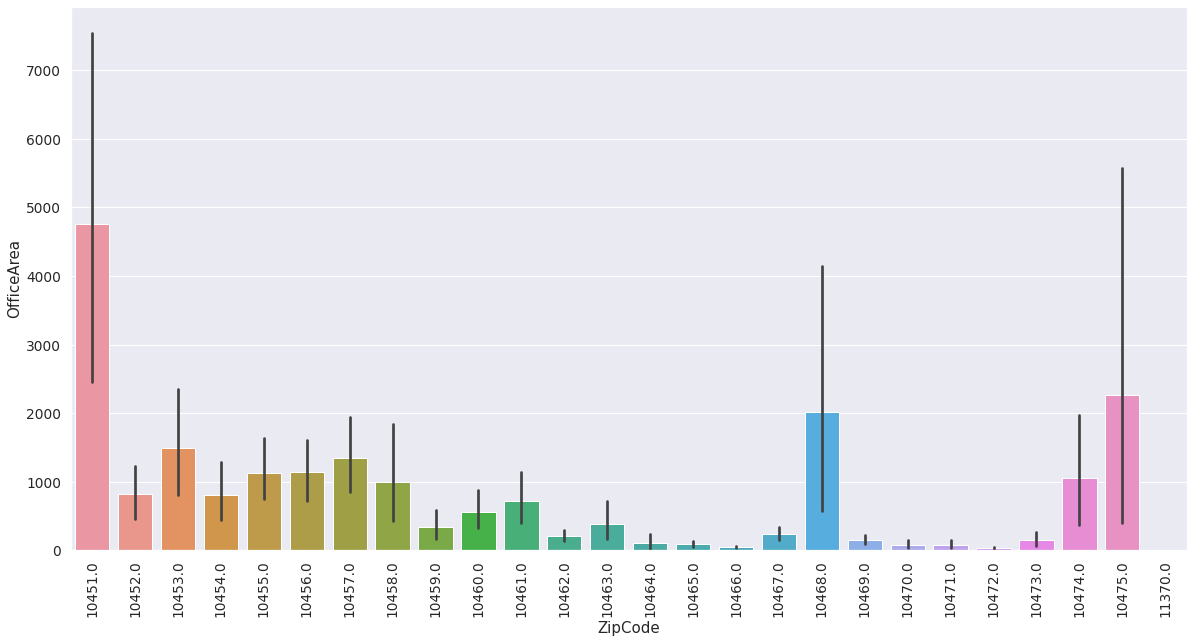

In [44]:
plt.figure(figsize=(20,10))
sns.barplot(x='ZipCode',y='OfficeArea',data=df)
plt.xticks(rotation=90)
plt.show()

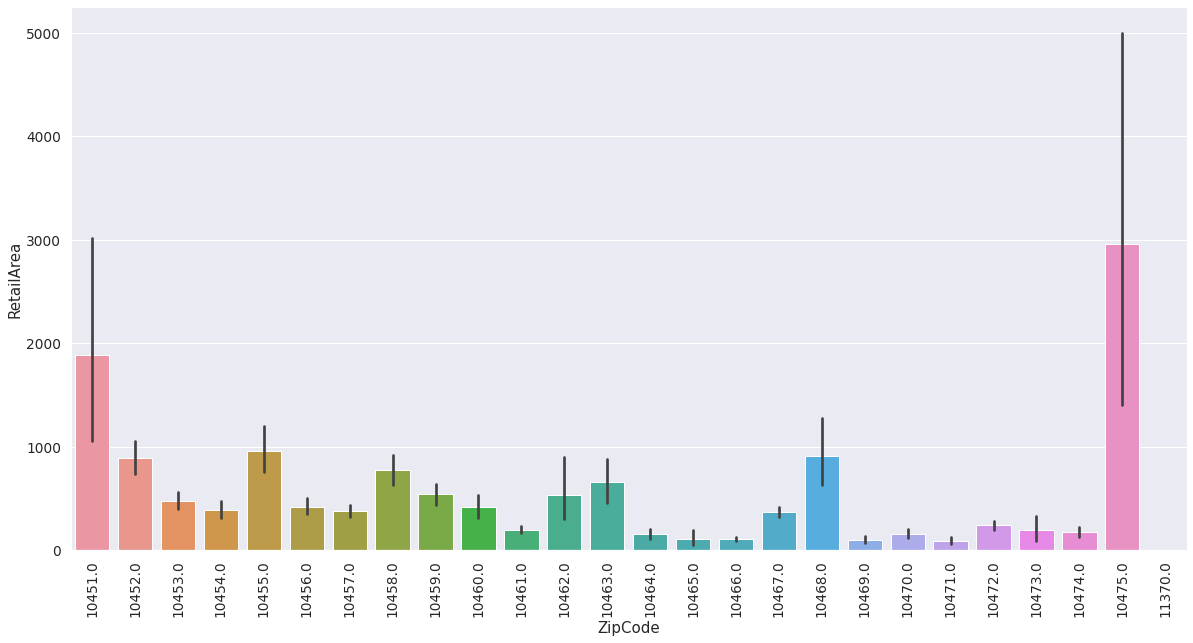

In [45]:
plt.figure(figsize=(20,10))
sns.barplot(x='ZipCode',y='RetailArea',data=df)
plt.xticks(rotation=90)
plt.show()

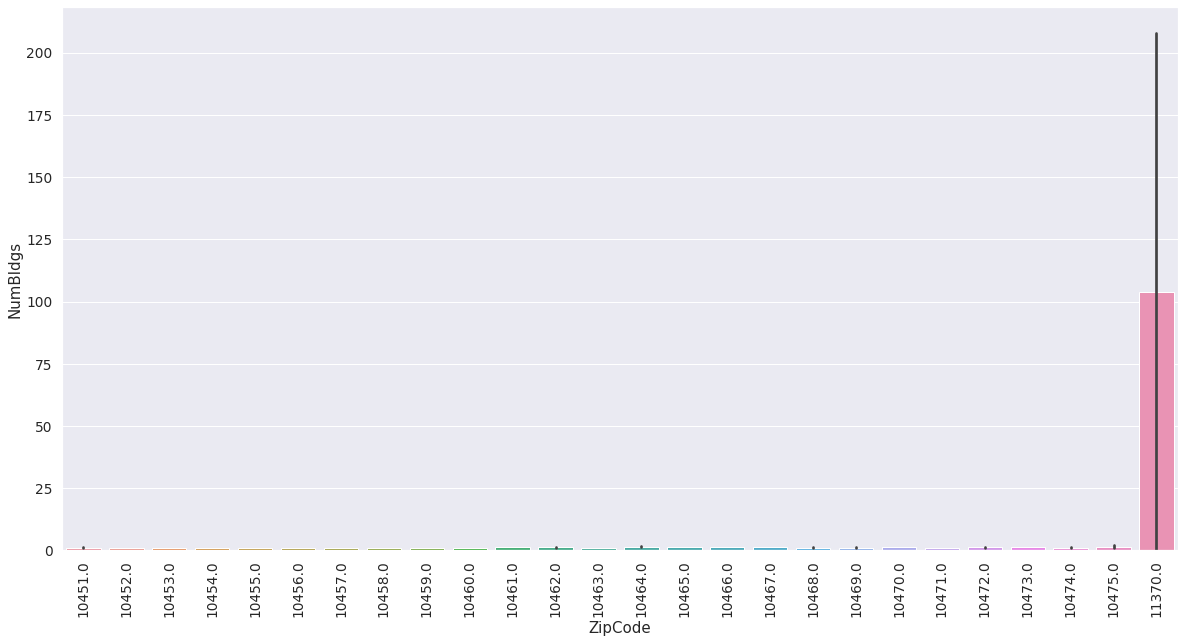

In [46]:
plt.figure(figsize=(20,10))
sns.barplot(x='ZipCode',y='NumBldgs',data=df)
plt.xticks(rotation=90)
plt.show()

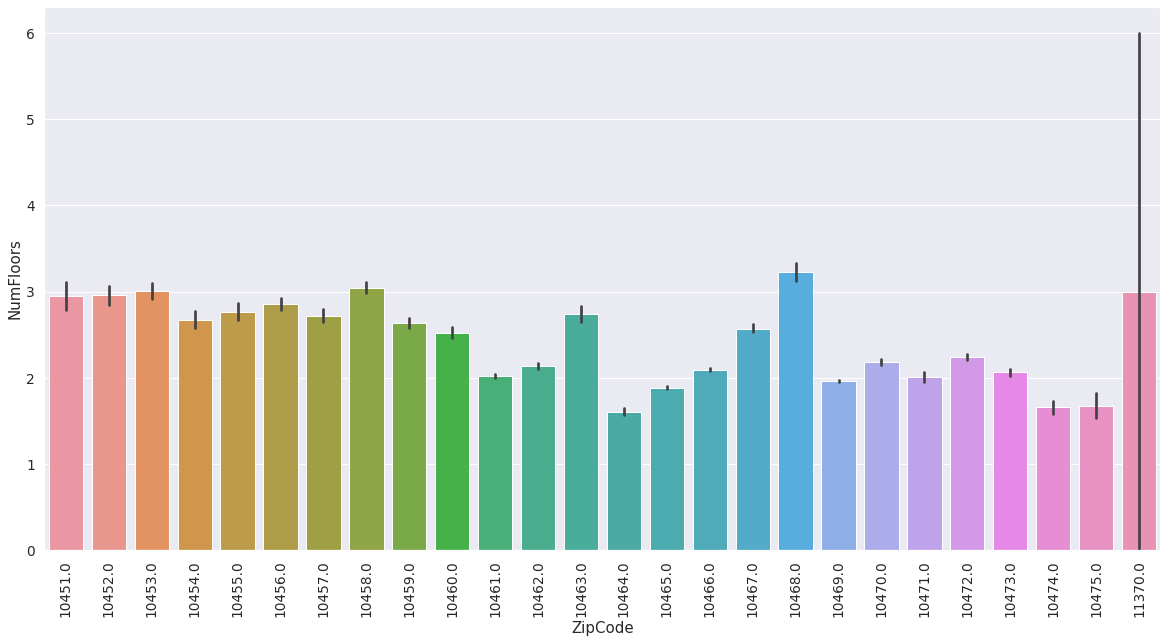

In [49]:
plt.figure(figsize=(20,10))
sns.barplot(x='ZipCode',y='NumFloors',data=df)
plt.xticks(rotation=90)
plt.show()

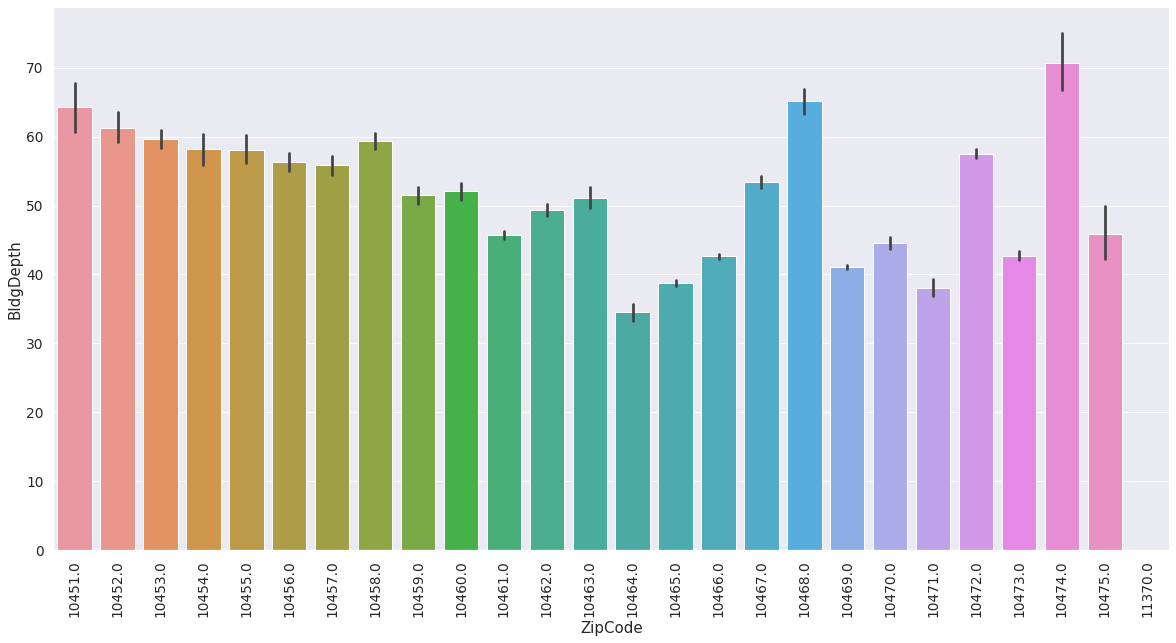

In [50]:
plt.figure(figsize=(20,10))
sns.barplot(x='ZipCode',y='BldgDepth',data=df)
plt.xticks(rotation=90)
plt.show()

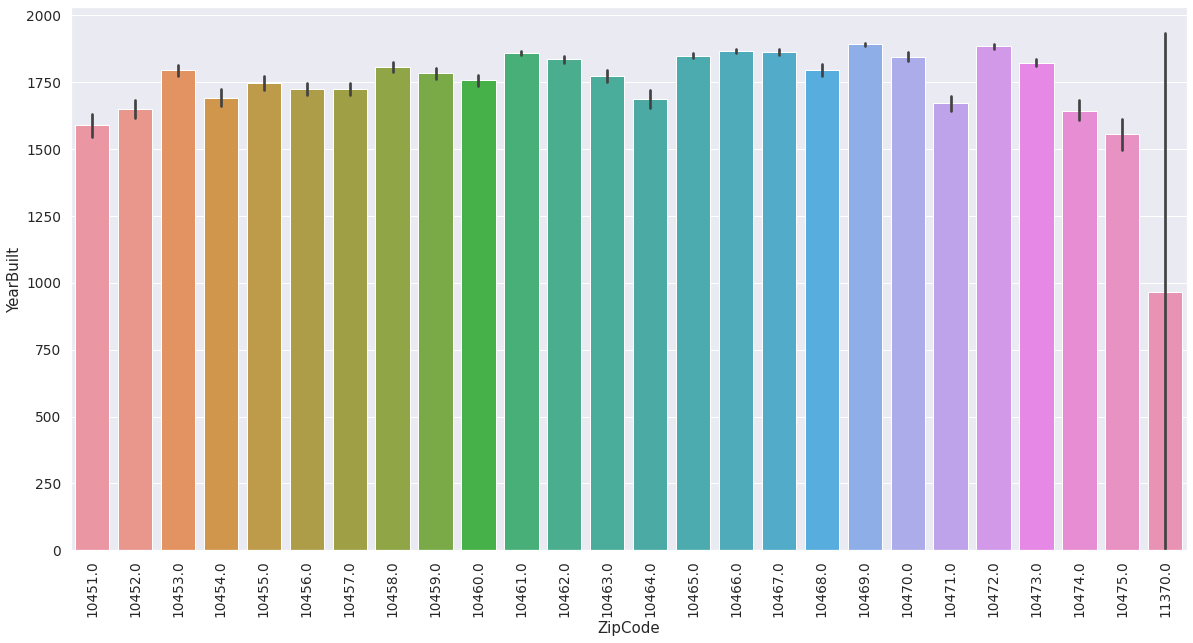

In [51]:
plt.figure(figsize=(20,10))
sns.barplot(x='ZipCode',y='YearBuilt',data=df)
plt.xticks(rotation=90)
plt.show()

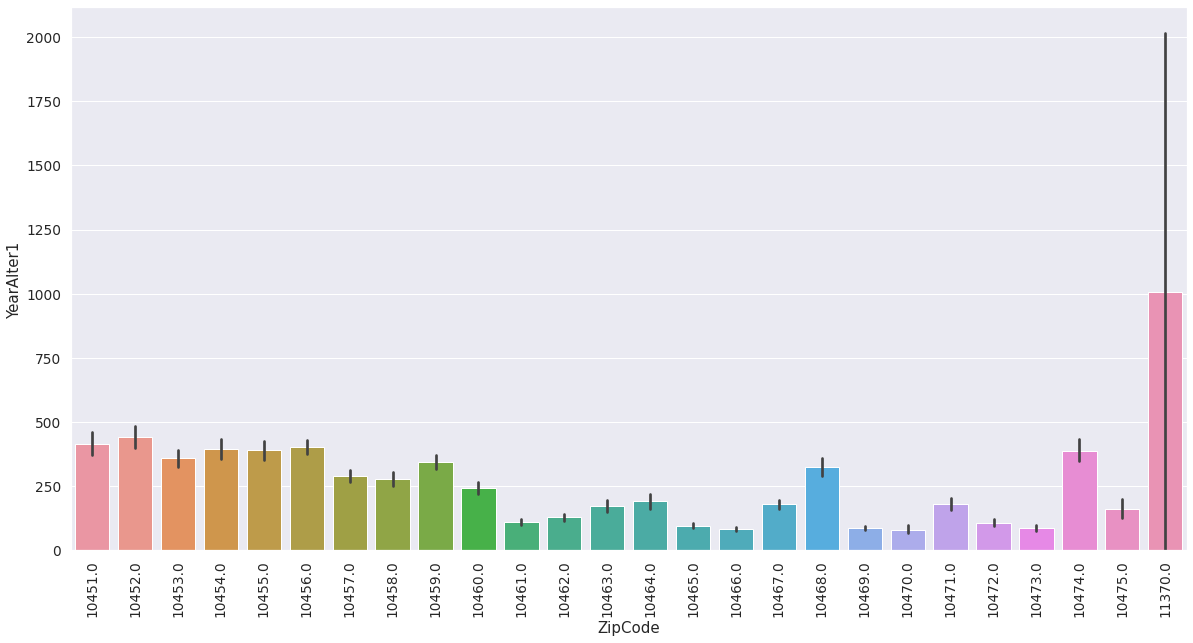

In [52]:
plt.figure(figsize=(20,10))
sns.barplot(x='ZipCode',y='YearAlter1',data=df)
plt.xticks(rotation=90)
plt.show()

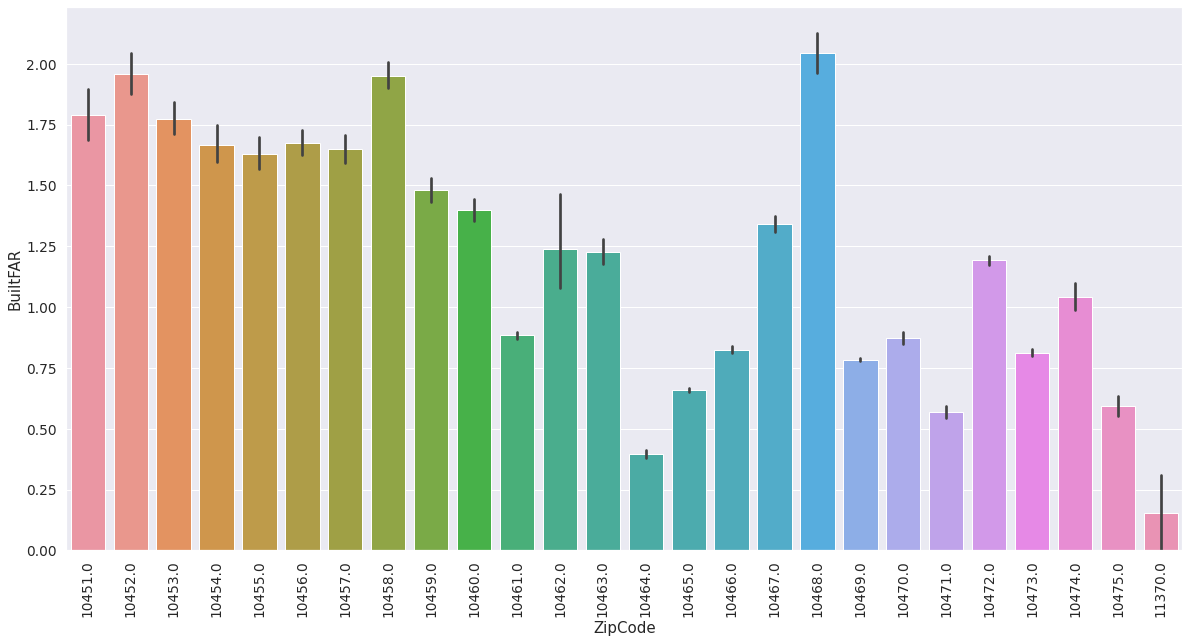

In [54]:
plt.figure(figsize=(20,10))
sns.barplot(x='ZipCode',y='BuiltFAR',data=df)
plt.xticks(rotation=90)
plt.show()

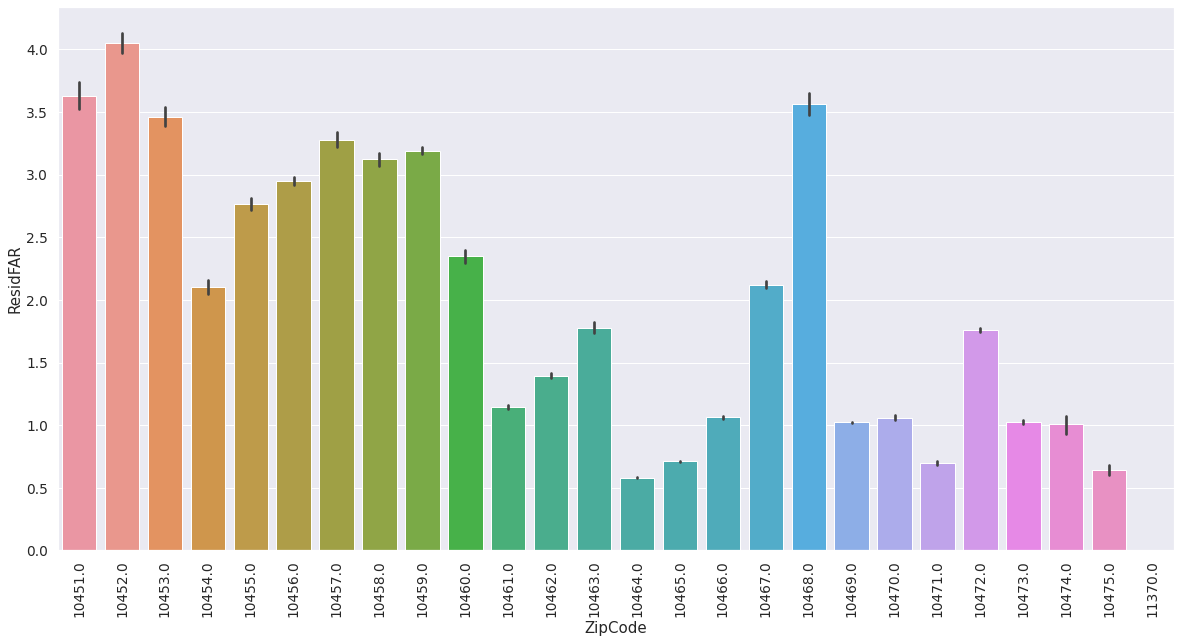

In [55]:
plt.figure(figsize=(20,10))
sns.barplot(x='ZipCode',y='ResidFAR',data=df)
plt.xticks(rotation=90)
plt.show()

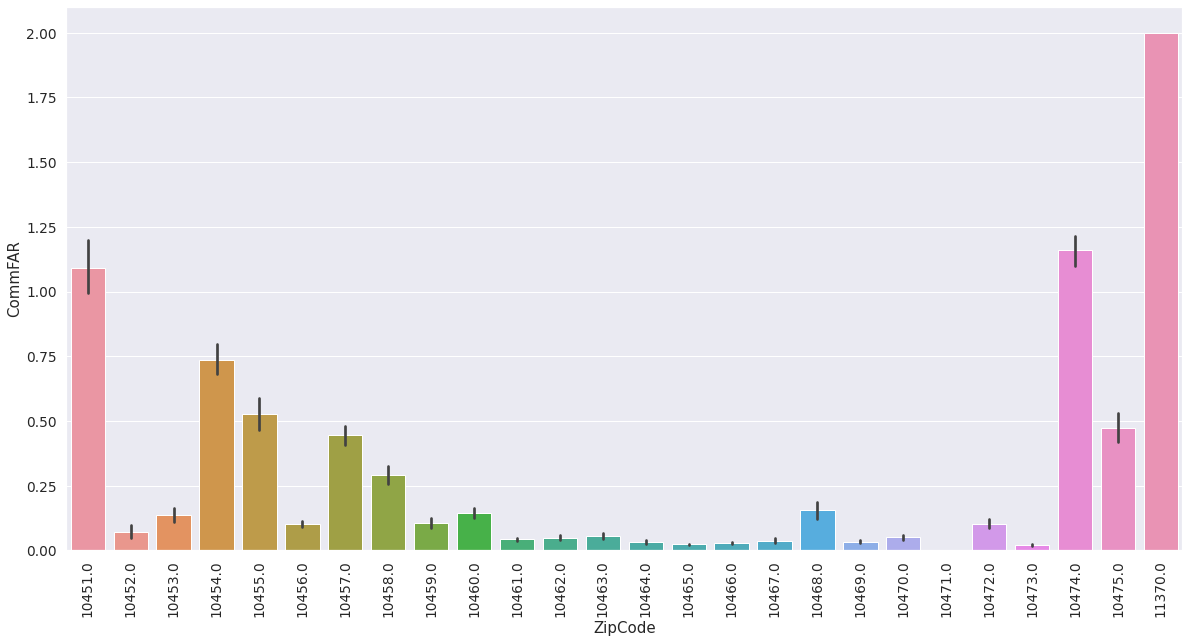

In [56]:
plt.figure(figsize=(20,10))
sns.barplot(x='ZipCode',y='CommFAR',data=df)
plt.xticks(rotation=90)
plt.show()

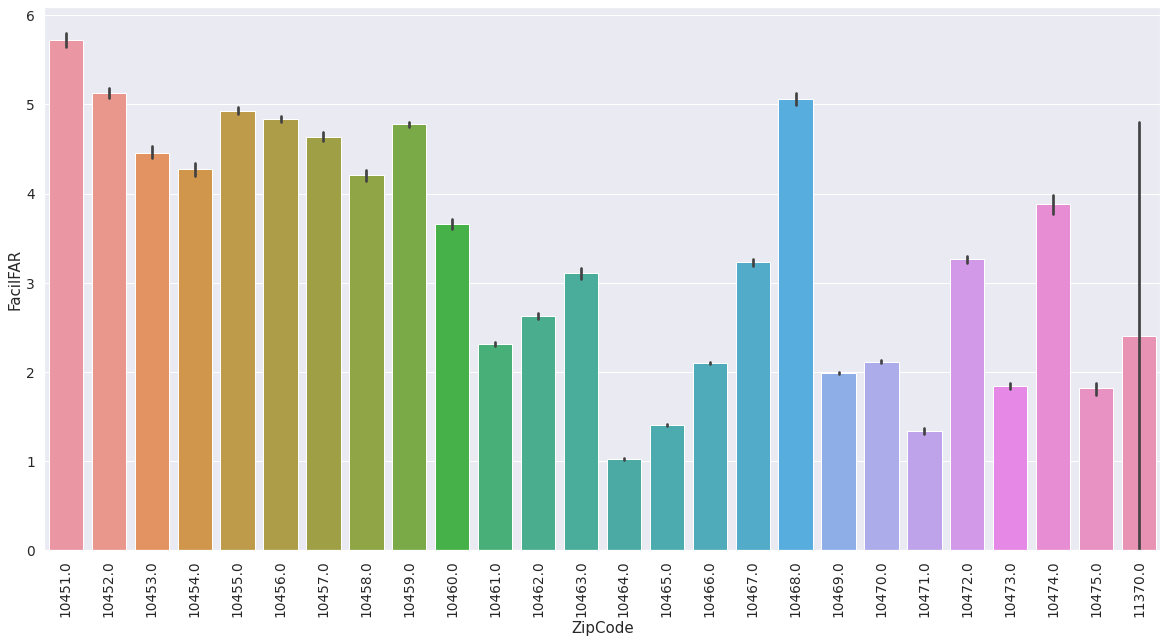

In [57]:
plt.figure(figsize=(20,10))
sns.barplot(x='ZipCode',y='FacilFAR',data=df)
plt.xticks(rotation=90)
plt.show()

Conclusion
Does the Complaint Type that you identified in response to Question 1 have an obvious relationship with any particular characteristic or characteristic of the Houses?

ComArea with BldgArea, ResArea with BldgArea, BuiltFAR with NumFloors, FacilFAR with ResidFAR